In [18]:
#Exploração dos Dados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("✅")

✅


In [17]:
# Configuração de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

In [16]:
# Recarregar dados
df_order = pd.read_csv('/content/Order_semicolon.csv', sep=';')
df_campaign_queue = pd.read_csv('/content/CampaignQueue_semicolon.csv', sep=';')
df_campaign = pd.read_csv('/content/Campaign_semicolon.csv', sep=';')

In [15]:
# Estatísticas básicas
print("\nEstatísticas numéricas Orders:")
display(df_order.describe())


Estatísticas numéricas Orders:


,id,createdAt,customer,integrationId,preparationTime,takeOutTimeInSeconds,totalAmount
count,2000.000000,2000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000
mean,1000.500000,2025-03-07 02:50:06.030000128,489.767500,5416.93800,47.327500,1842.53450,59.773255
min,1.000000,2024-09-02 20:04:00,1.000000,1007.00000,5.000000,60.00000,11.030000
25%,500.750000,2024-12-07 16:36:30,237.000000,3147.75000,26.000000,953.75000,33.260000
50%,1000.500000,2025-03-05 12:45:00,490.500000,5331.50000,48.000000,1852.00000,51.270000
75%,1500.250000,2025-06-09 13:52:30,729.000000,7700.25000,69.000000,2710.50000,76.537500
max,2000.000000,2025-09-02 17:54:00,1000.000000,9993.00000,90.000000,3598.00000,239.040000
std,577.494589,NaN,287.741989,2614.88385,24.746948,1012.43585,35.455128


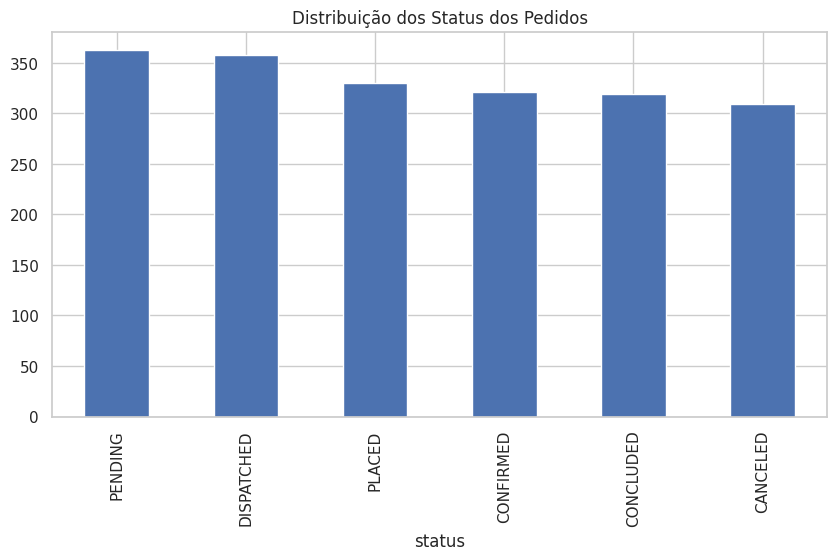

In [14]:
#Status dos pedidos
plt.figure()
df_order["status"].value_counts().plot(kind="bar")
plt.title("Distribuição dos Status dos Pedidos")
plt.show()

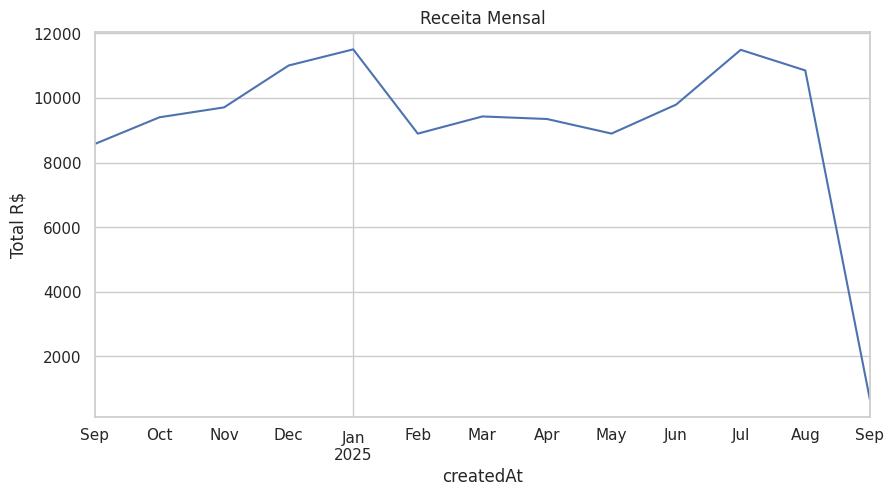

In [13]:
#Receita mensal
df_order["createdAt"] = pd.to_datetime(df_order["createdAt"], errors="coerce", dayfirst=True)
df_order.groupby(df_order["createdAt"].dt.to_period("M"))["totalAmount"].sum().plot()
plt.title("Receita Mensal")
plt.ylabel("Total R$")
plt.show()


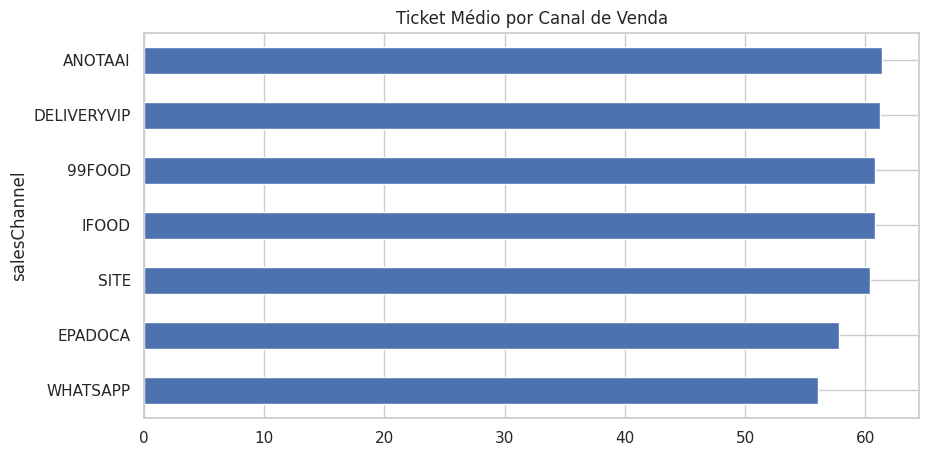

In [12]:
#Ticket médio por canal
ticket = df_order.groupby("salesChannel")["totalAmount"].mean().sort_values()
ticket.plot(kind="barh")
plt.title("Ticket Médio por Canal de Venda")
plt.show()